In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

In [2]:
epsilon0 = 8.85418782e-12
mu0 = 1.25663706e-6
c0 = 1/np.sqrt(epsilon0*mu0)
imp0 = np.sqrt(mu0/epsilon0)

In [3]:
jmax = 1000
jsource = 300
nmax = 5000

In [4]:
lambda_min = 1550e-9
dx = lambda_min/200
dt = dx/c0

In [5]:
def source_pulse(t):
    lambda_0 = 300e-9
    w0 = 2*np.pi*c0/lambda_0
    tau = 30
    
    return np.exp(-((t-tau*3)**2)/tau**2)*np.sin(w0*t*dt)

In [6]:
Ex_all = np.zeros((nmax, jmax))
Hz_all = np.zeros((nmax, jmax))

eps = epsilon0

# Simulation loop
for n in range(1, nmax):
    for j in range(jmax-1):
        Hz_all[n, j] = Hz_all[n-1, j] + dt / (dx * mu0) * (Ex_all[n-1, j+1] - Ex_all[n-1, j])
    Hz_all[n, jsource-1] -= source_pulse(n) / imp0
    for j in range(1, jmax):
        Ex_all[n, j] = Ex_all[n-1, j] + dt / (dx * eps) * (Hz_all[n, j] - Hz_all[n, j-1])
    Ex_all[n, jsource] += source_pulse(n+1)

def plot_frame(n=0):
    plt.figure(figsize=(8, 5))
    plt.plot(Ex_all[n, :])
    plt.title(f"Electric Field at Time Step: {n}")
    plt.ylim(-1.5, 1.5)
    plt.show()

# Create an interactive widget
interact(plot_frame, n=IntSlider(min=0, max=nmax-1, step=1, value=0, description='Time Step'))

interactive(children=(IntSlider(value=0, description='Time Step', max=4999), Output()), _dom_classes=('widget-…

<function __main__.plot_frame(n=0)>

In [7]:
Ex_all = np.zeros((nmax, jmax))
Hz_all = np.zeros((nmax, jmax))

eps = epsilon0

# Simulation loop
for n in range(1, nmax):
    Hz_all[n, jmax-1] = Hz_all[n-1, jmax-2]
    for j in range(jmax-1):
        Hz_all[n, j] = Hz_all[n-1, j] + dt / (dx * mu0) * (Ex_all[n-1, j+1] - Ex_all[n-1, j])
    Hz_all[n, jsource-1] -= source_pulse(n) / imp0
    Ex_all[n, 0] = Ex_all[n-1, 1]
    for j in range(1, jmax):
        Ex_all[n, j] = Ex_all[n-1, j] + dt / (dx * eps) * (Hz_all[n, j] - Hz_all[n, j-1])
    Ex_all[n, jsource] += source_pulse(n+1)

def plot_frame(n=0):
    plt.figure(figsize=(8, 5))
    plt.plot(Ex_all[n, :])
    plt.title(f"Electric Field at Time Step: {n}")
    plt.ylim(-1.5, 1.5)
    plt.show()

# Create an interactive widget
interact(plot_frame, n=IntSlider(min=0, max=nmax-1, step=1, value=0, description='Time Step'))

interactive(children=(IntSlider(value=0, description='Time Step', max=4999), Output()), _dom_classes=('widget-…

<function __main__.plot_frame(n=0)>

In [8]:
Ex_all = np.zeros((nmax, jmax))
Hz_all = np.zeros((nmax, jmax))

eps = np.ones(jmax)*epsilon0
eps[700:800] = 10*epsilon0

# Simulation loop
for n in range(1, nmax):
    Hz_all[n, jmax-1] = Hz_all[n-1, jmax-2]
    for j in range(jmax-1):
        Hz_all[n, j] = Hz_all[n-1, j] + dt / (dx * mu0) * (Ex_all[n-1, j+1] - Ex_all[n-1, j])
    Hz_all[n, jsource-1] -= source_pulse(n) / imp0
    Ex_all[n, 0] = Ex_all[n-1, 1]
    for j in range(1, jmax):
        Ex_all[n, j] = Ex_all[n-1, j] + dt / (dx * eps[j]) * (Hz_all[n, j] - Hz_all[n, j-1])
    Ex_all[n, jsource] += source_pulse(n+1)

def plot_frame(n=0):
    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Plotting the Electric field
    color = 'tab:red'
    ax1.plot(Ex_all[n, :], color=color)
    ax1.set_xlabel('Position')
    ax1.set_ylabel('Electric Field (V/m)', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(-1.5, 1.5)
    ax1.set_title(f"Electric Field and Permittivity at Time Step: {n}")

    # Create a second y-axis for the permittivity
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.plot(eps / epsilon0, color=color)  # Normalize eps by epsilon0 for better visibility
    ax2.set_ylabel('Relative Permittivity (ε/ε₀)', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0, 11)  # Adjust y-limit to permittivity range

    plt.show()

# Create an interactive widget
interact(plot_frame, n=IntSlider(min=0, max=nmax-1, step=1, value=0, description='Time Step'))

interactive(children=(IntSlider(value=0, description='Time Step', max=4999), Output()), _dom_classes=('widget-…

<function __main__.plot_frame(n=0)>

In [21]:
def source_CW(t):
    lambda_0 = 300e-9
    w0 = 2*np.pi*c0/lambda_0
    tau = 30
    
    return np.exp(-((t-tau*10)/(5*tau))**10)*np.sin(w0*t*dt)
    #return np.sin(w0*t*dt)

In [22]:
Ex_all = np.zeros((nmax, jmax))
Dx_all = np.zeros((nmax, jmax))
Hz_all = np.zeros((nmax, jmax))

eps = np.ones(jmax)*epsilon0
eps[700:800] = 10*epsilon0
X2 = np.zeros(jmax)
X2[700:800] = 0

# Simulation loop
for n in range(1, nmax):
    Hz_all[n, jmax-1] = Hz_all[n-1, jmax-2]
    for j in range(jmax-1):
        Hz_all[n, j] = Hz_all[n-1, j] + dt / (dx * mu0) * (Ex_all[n-1, j+1] - Ex_all[n-1, j])
    Hz_all[n, jsource-1] -= source_CW(n) / imp0
    Ex_all[n, 0] = Ex_all[n-1, 1]
    for j in range(1, jmax):
        Dx_all[n, j] = Dx_all[n-1, j] + dt / (dx) * (Hz_all[n, j] - Hz_all[n, j-1])
        Ex_all[n, j] = Dx_all[n, j] / (eps[j]+epsilon0*X2[j]*Ex_all[n, j-1])
    Ex_all[n, jsource] += source_CW(n+1)

def plot_frame(n=0):
    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Plotting the Electric field
    color = 'tab:red'
    ax1.plot(Ex_all[n, :], color=color)
    ax1.set_xlabel('Position')
    ax1.set_ylabel('Electric Field (V/m)', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(-1.5, 1.5)
    ax1.set_title(f"Electric Field and Permittivity at Time Step: {n}")

    # Create a second y-axis for the permittivity
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.plot(eps / epsilon0, color=color)  # Normalize eps by epsilon0 for better visibility
    ax2.set_ylabel('Relative Permittivity (ε/ε₀)', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0, 11)  # Adjust y-limit to permittivity range

    plt.show()

# Create an interactive widget
interact(plot_frame, n=IntSlider(min=0, max=nmax-1, step=1, value=0, description='Time Step'))

interactive(children=(IntSlider(value=0, description='Time Step', max=4999), Output()), _dom_classes=('widget-…

<function __main__.plot_frame(n=0)>

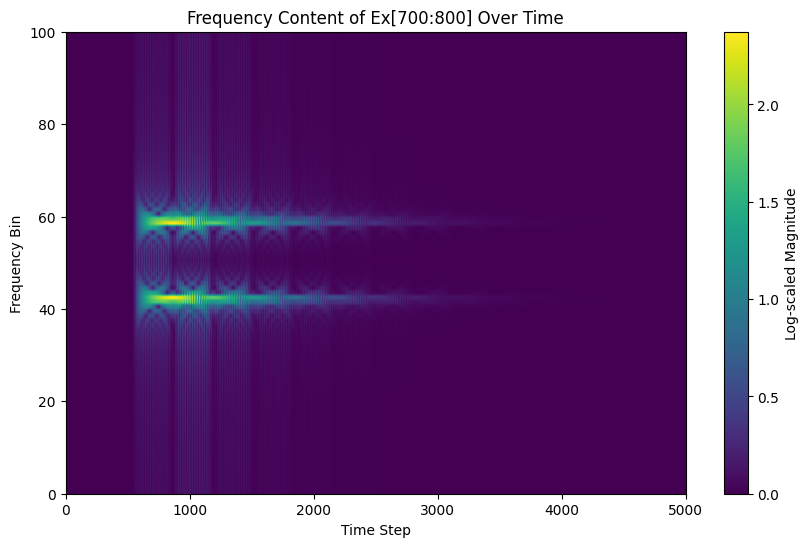

In [23]:
region_start = 700
region_end = 800

# Frequency analysis setup
frequency_content = np.zeros((nmax, region_end - region_start))

for n in range(nmax):
    region_data = Ex_all[n, region_start:region_end]
    fft_result = np.fft.fftshift(np.fft.fft(region_data))
    frequency_content[n, :] = np.abs(fft_result)

# Normalize frequency content for better visualization
frequency_content = np.log1p(frequency_content)  # Logarithmic scale for better visibility

# Visualizing the frequency content over time
plt.figure(figsize=(10, 6))
plt.imshow(frequency_content.T, aspect='auto', origin='lower',
           extent=[0, nmax, 0, region_end - region_start])
plt.colorbar(label='Log-scaled Magnitude')
plt.xlabel('Time Step')
plt.ylabel('Frequency Bin')
plt.title('Frequency Content of Ex[700:800] Over Time')
plt.show()

In [24]:
Ex_all = np.zeros((nmax, jmax))
Dx_all = np.zeros((nmax, jmax))
Hz_all = np.zeros((nmax, jmax))

eps = np.ones(jmax)*epsilon0
eps[700:800] = 10*epsilon0
X2 = np.zeros(jmax)
X2[700:800] = 2

# Simulation loop
for n in range(1, nmax):
    Hz_all[n, jmax-1] = Hz_all[n-1, jmax-2]
    for j in range(jmax-1):
        Hz_all[n, j] = Hz_all[n-1, j] + dt / (dx * mu0) * (Ex_all[n-1, j+1] - Ex_all[n-1, j])
    Hz_all[n, jsource-1] -= source_CW(n) / imp0
    Ex_all[n, 0] = Ex_all[n-1, 1]
    for j in range(1, jmax):
        Dx_all[n, j] = Dx_all[n-1, j] + dt / (dx) * (Hz_all[n, j] - Hz_all[n, j-1])
        Ex_all[n, j] = Dx_all[n, j] / (eps[j]+epsilon0*X2[j]*Ex_all[n, j-1])
    Ex_all[n, jsource] += source_CW(n+1)

def plot_frame(n=0):
    fig, ax1 = plt.subplots(figsize=(8, 5))

    # Plotting the Electric field
    color = 'tab:red'
    ax1.plot(Ex_all[n, :], color=color)
    ax1.set_xlabel('Position')
    ax1.set_ylabel('Electric Field (V/m)', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(-1.5, 1.5)
    ax1.set_title(f"Electric Field and Permittivity at Time Step: {n}")

    # Create a second y-axis for the permittivity
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.plot(eps / epsilon0, color=color)  # Normalize eps by epsilon0 for better visibility
    ax2.set_ylabel('Relative Permittivity (ε/ε₀)', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0, 11)  # Adjust y-limit to permittivity range

    plt.show()

# Create an interactive widget
interact(plot_frame, n=IntSlider(min=0, max=nmax-1, step=1, value=0, description='Time Step'))

interactive(children=(IntSlider(value=0, description='Time Step', max=4999), Output()), _dom_classes=('widget-…

<function __main__.plot_frame(n=0)>

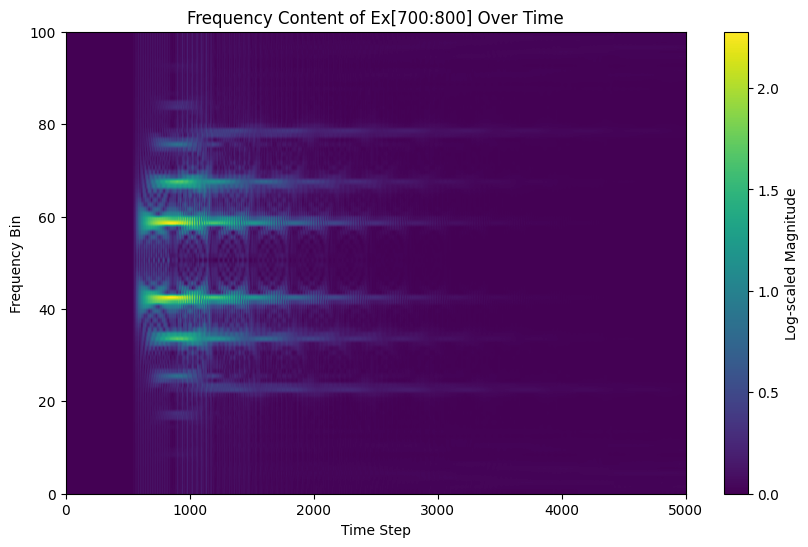

In [25]:
region_start = 700
region_end = 800

# Frequency analysis setup
frequency_content = np.zeros((nmax, region_end - region_start))

for n in range(nmax):
    region_data = Ex_all[n, region_start:region_end]
    fft_result = np.fft.fftshift(np.fft.fft(region_data))
    frequency_content[n, :] = np.abs(fft_result)

# Normalize frequency content for better visualization
frequency_content = np.log1p(frequency_content)  # Logarithmic scale for better visibility

# Visualizing the frequency content over time
plt.figure(figsize=(10, 6))
plt.imshow(frequency_content.T, aspect='auto', origin='lower',
           extent=[0, nmax, 0, region_end - region_start])
plt.colorbar(label='Log-scaled Magnitude')
plt.xlabel('Time Step')
plt.ylabel('Frequency Bin')
plt.title('Frequency Content of Ex[700:800] Over Time')
plt.show()